In [54]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

In [55]:
df=pd.read_csv("E:/PICT 3rd/subject material/DSBDA Prep/Datasets/heart (1).csv")

In [56]:
df.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [57]:
# data cleaning

In [58]:
df.replace('?', np.nan, inplace=True)

In [59]:
df=df.dropna()

In [60]:
df=df.apply(pd.to_numeric)

In [61]:
#negative values remove

In [62]:
columns_to_check = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']

In [63]:
def remove_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
    return df



In [64]:
df = remove_outliers_iqr(df, columns_to_check)

In [65]:
#data transform

In [66]:
X=df.drop('output',axis=1)

In [67]:
y=df['output']

In [68]:
scaler=StandardScaler()
x_scaled=scaler.fit_transform(X)
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.2,random_state=42)

In [69]:
#logistic regression

In [70]:
lr=LogisticRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_acc=accuracy_score(y_test,lr_pred)

In [71]:
print(f"Logistic Regression Accuracy: {lr_acc:.2f}")

Logistic Regression Accuracy: 0.86


In [73]:
knn=  KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_acc=accuracy_score(y_test,knn_pred)

In [74]:
print(f"kNN Accuracy: {knn_acc:.2f}")

kNN Accuracy: 0.79


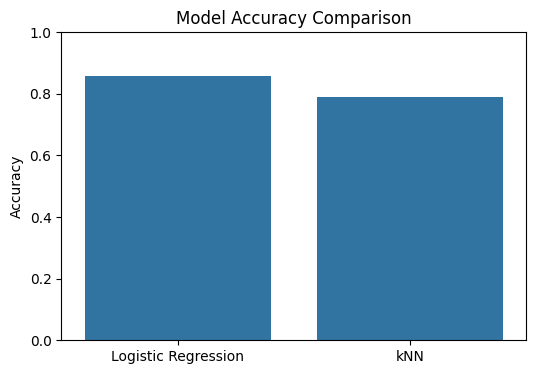

In [75]:
# --- Accuracy Comparison Plot ---
models = ['Logistic Regression', 'kNN']
scores = [lr_acc, knn_acc]
plt.figure(figsize=(6, 4))
sns.barplot(x=models, y=scores)
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.title('Model Accuracy Comparison')
plt.show()

In [ ]:
# import pandas as pd
# import numpy as np
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.linear_model import LogisticRegression
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.metrics import accuracy_score
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Load dataset
# df = pd.read_csv('heart.csv')  # Replace with your file path if needed

# # --- Data Cleaning ---
# df.replace('?', np.nan, inplace=True)
# df = df.dropna()
# df = df.apply(pd.to_numeric)

# # Rename columns for consistency (optional)
# df.columns = ['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg',
#               'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'output']

# # Remove negative values from relevant columns
# columns_to_check = ['age', 'trtbps', 'chol', 'thalachh', 'oldpeak']
# for col in columns_to_check:
#     df = df[df[col] >= 0]

# # --- Outlier Removal using IQR ---
# Q1 = df.quantile(0.25)
# Q3 = df.quantile(0.75)
# IQR = Q3 - Q1
# df = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]

# # --- Data Transformation ---
# X = df.drop('output', axis=1)
# y = df['output']
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# # --- Logistic Regression ---
# lr = LogisticRegression()
# lr.fit(X_train, y_train)
# lr_preds = lr.predict(X_test)
# lr_acc = accuracy_score(y_test, lr_preds)

# # --- k-Nearest Neighbors ---
# knn = KNeighborsClassifier(n_neighbors=5)
# knn.fit(X_train, y_train)
# knn_preds = knn.predict(X_test)
# knn_acc = accuracy_score(y_test, knn_preds)

# # --- Results ---
# print(f"Logistic Regression Accuracy: {lr_acc:.2f}")
# print(f"kNN Accuracy: {knn_acc:.2f}")

# # --- Accuracy Comparison Plot ---
# models = ['Logistic Regression', 'kNN']
# scores = [lr_acc, knn_acc]
# plt.figure(figsize=(6, 4))
# sns.barplot(x=models, y=scores)
# plt.ylim(0, 1)
# plt.ylabel('Accuracy')
# plt.title('Model Accuracy Comparison')
# plt.show()
